<a href="https://colab.research.google.com/github/oghenerosiloko/Telecom-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

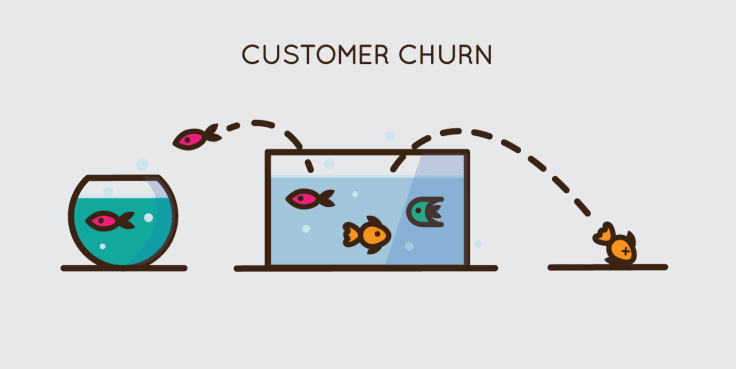

# **Telco Customer Churn**
### **Customer Retention Focus**
The analysis below aim to evaluate the costumer behaviour of the Telecom company especially as regards the churn rate of customers from their services. I will be exploring the dataset of the telecom to assess the various factors that influence the churn rate of their customers and proffer possible solutions from the insights that would be derived from the analysis.

 #Importing Dataset and Necessary Libraries#

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 Telco=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Teleco_churn.csv")

In [ ]:
#Check imported data
Telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
 
#Check Data Columns
Telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#checking Data shape
Telco.shape

(7043, 21)

We can see the data consist of 7043 rows and 21 columns...

In [ ]:
#check for data types
Telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The Total charge column is object type which is not supposed to be, we therefore have to convert it to float type as it should be

In [ ]:
#Convert Total charges column from Object to float
Telco['TotalCharges']=pd.to_numeric(Telco['TotalCharges'], errors='coerce')

In [ ]:
Telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Let's take a look at Missing Data

In [ ]:
 Telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Looking at the results above, we only seem to have missing data in the total Charges column.
We would drop the missing column as they are small compared to the whole dataset


In [28]:
#Droping missing rows
Telco=Telco.dropna(axis=0,how='any')

Lets take a last look at our data quality


In [31]:
Telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
 Telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Great, No missing values 
Data Looks Clean and Ready for analysis


# **Exploratory Analysis**


In [36]:
Telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We want to evaluate how all the various factors that influnce churn 
The various factors to look at in the Telco can be classified into Demographics of Customer, Services signed up for and Account information

### **Customer Demographics**
These Includes gender, age range, and if they have partners and dependents
### **Services**
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
### **Account Information**
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
### **Target Variable**
Customers who left within the last month – the column is called Churn. We would evaluate other factors in respect to the rate of Churn.


Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

Target Rate % 0.27


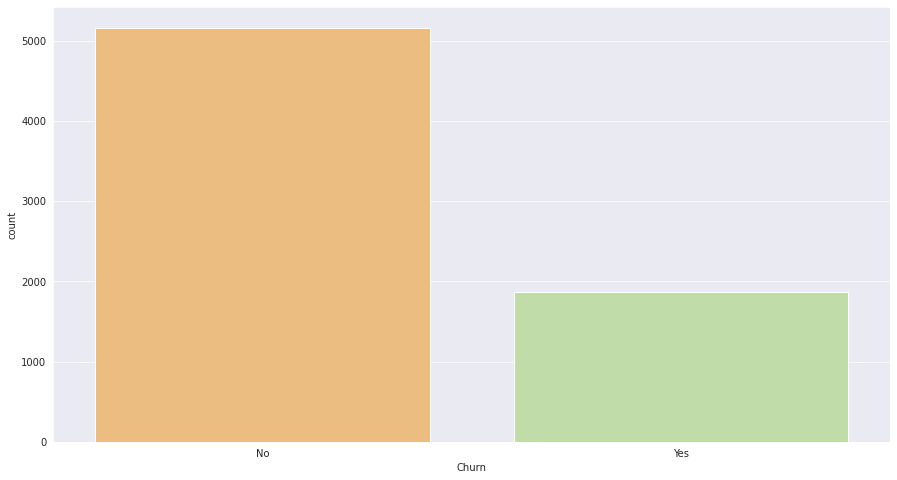

In [42]:
#Lets look at the Churn rate and Number of customers churning
print(Telco.groupby('Churn')['Churn'].count())
print('')
print('Target Rate %',(Telco[Telco.Churn=='Yes']['customerID'].count()/Telco['customerID'].count()).round(2))
sns.countplot(x='Churn',data=Telco, palette='Spectral')
plt.rcParams['figure.figsize']=8,6
sns.set_style('darkgrid' )

The churn is the rate at which customers are leaving the Telco company
The plot above shows that their is 27% churn rate of total customers while the remaining 73% stays. Our goal is to evaluate the factors that influnce the 27% churn rate.


# **Demographics**

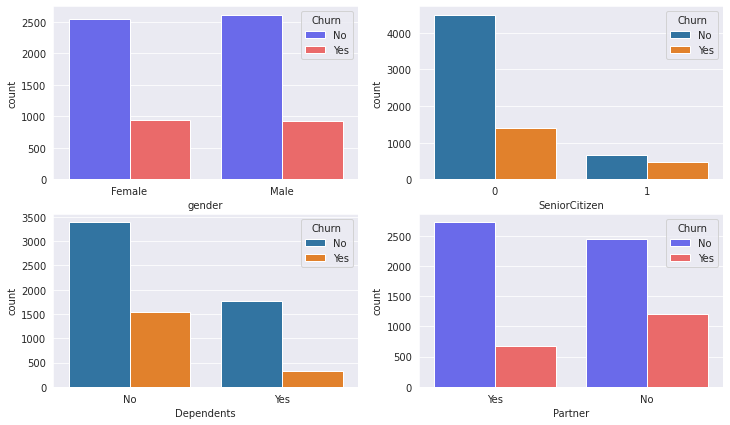

In [53]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))


# plot 1
sns.countplot( data= Telco, x='gender',hue='Churn',palette="seismic", ax=axes[0,0])

# plot 2
sns.countplot( data= Telco, x='SeniorCitizen',hue='Churn', ax=axes[0,1])

# plot 3
sns.countplot( data= Telco, x='Dependents',hue='Churn', ax=axes[1,0])

# plot 4
sns.countplot( data= Telco, x='Partner',hue='Churn', palette="seismic",ax=axes[1,1])


1. Gender seems to have no influence on Customers Churn rate as both male and female churn are equally distributed
2. Non Senior citizens are more likly to Churn compare to their senior citizen.
3. Customers having no dependents (most likely single and young working without family) are more likely to Churn compared to Customers who have dependents.
4. Customers with no Partners are more likely to churn buttering the non dependent Churn rate.


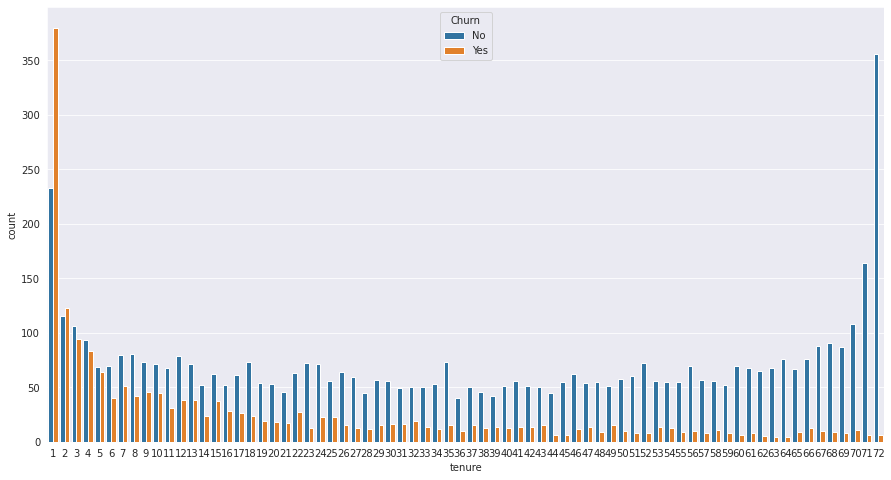

In [57]:
sns.countplot(data=Telco,x="tenure",hue='Churn')
plt.rcParams['figure.figsize']=15,8
sns.set_style('darkgrid' )

The Tenure is the Number of Months the Customer have stayed with the company, from the analysis, Newer Customers who have spent less than 30 months have higher likelihood of churning compared to customers who have stayed longer with the company. Further Analysis will reveal more on the reasons for Churning.

# **Services**

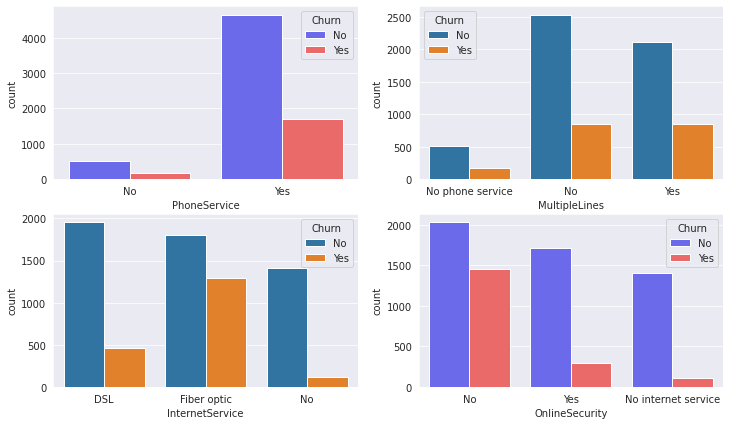

In [59]:

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
# plot 1
sns.countplot( data= Telco, x='PhoneService',hue='Churn',palette="seismic", ax=axes[0,0])
# plot 2
sns.countplot( data= Telco, x='MultipleLines',hue='Churn', ax=axes[0,1])
# plot 3
sns.countplot( data= Telco, x='InternetService',hue='Churn', ax=axes[1,0])
# plot 4
sns.countplot( data= Telco, x='OnlineSecurity',hue='Churn', palette="seismic",ax=axes[1,1])


It can be seen from the above plots that services offered by Telco are the biggest factor that affect the Churn rate of customers
1. Customer with No online Security happens to churn the Most as compare with customers that have online security and no internet services.
2. Customers with Fiber Optic as Internet services looks more likely to churn, this might be due to cost or quality of the service.
3. Customer with Phone service churns more than customers with no phone service
4. Customers owing Multilines seem to have very little influence on Churn rate.



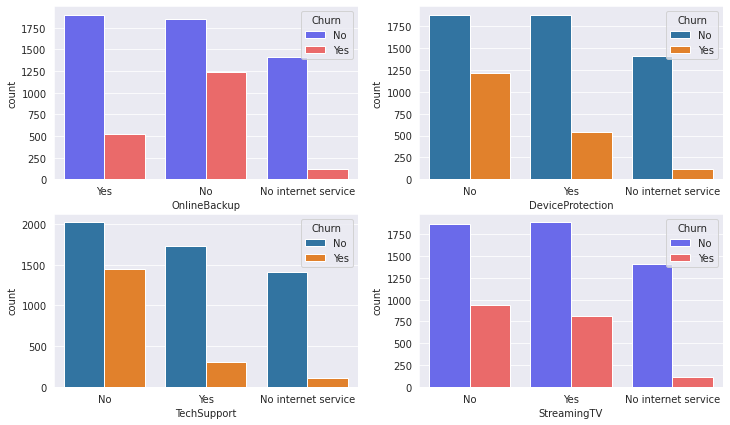

In [61]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
# plot 1
sns.countplot( data= Telco, x='OnlineBackup',hue='Churn',palette="seismic", ax=axes[0,0])
# plot 2
sns.countplot( data= Telco, x='DeviceProtection',hue='Churn', ax=axes[0,1])
# plot 3
sns.countplot( data= Telco, x='TechSupport',hue='Churn', ax=axes[1,0])
# plot 4
sns.countplot( data= Telco, x='StreamingTV',hue='Churn', palette="seismic",ax=axes[1,1])


1. Online Backup and TechSupport have a huge inflenuce on the Churn of Customers. customers with NO Tech support or Online Backup Churn way more than their counterparts.
2. Telco Customers with no device protection services Churns more than Those that have while streaming TV
 services seem to have an even distribution with however customers with No streaming services or with streaming services churning higher than those with no internet services.

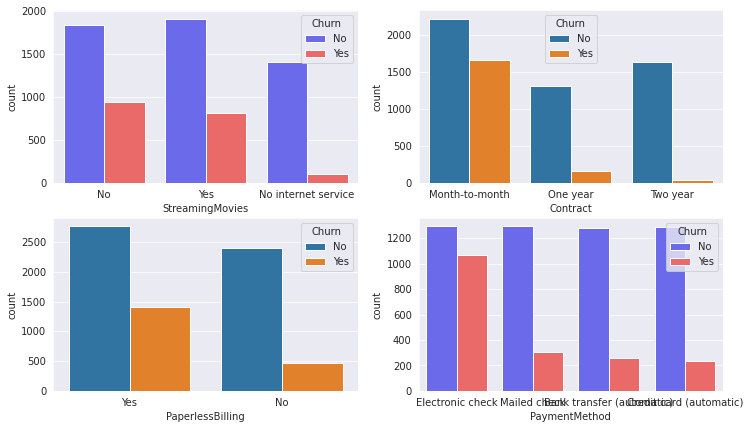

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
# plot 1
sns.countplot( data= Telco, x='StreamingMovies',hue='Churn',palette="seismic", ax=axes[0,0])
# plot 2
sns.countplot( data= Telco, x='Contract',hue='Churn', ax=axes[0,1])
# plot 3
sns.countplot( data= Telco, x='PaperlessBilling',hue='Churn', ax=axes[1,0])
# plot 4
sns.countplot( data= Telco, x='PaymentMethod',hue='Churn', palette="seismic",ax=axes[1,1])

For Payment services
1. Customers who use Paperless Billing most likely churn out of which those paying via Electronic Check Churns the highest compare to other payment methods.
2. Customers on Month to Month contract Churns the highest while the streaming movies service also have a somehoe even distribution of churn customers.

In [64]:
Telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

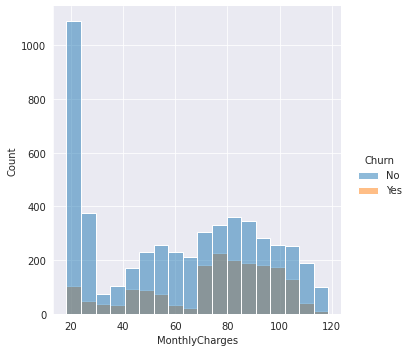

In [71]:

sns.displot( data=Telco, x='MonthlyCharges',hue='Churn')

Monthly Charges are great indicators for Churn rate and it reflect quiet evidently in this plot as customers that spend more on the 80 - 100 dollar rate are more likely to churn compared to customers who pay less on monthly charges.

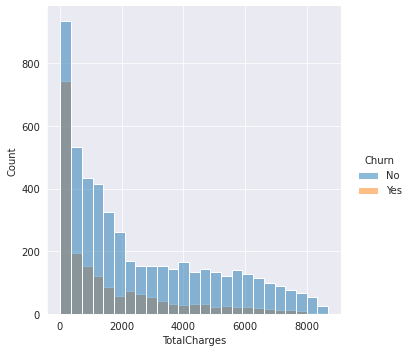

In [72]:
sns.displot( data=Telco, x='TotalCharges',hue='Churn')

# **Derived Insights**

From our investigation above, we can conclude that tenure, payment method,tech support,contract,device protection, monthly charges,online backup, online security and internet service all contribute to the reason why customers leave the company.

Customers that did not use the services(device protection,tech support,online security and online backup) would most likely churn.This could be as a result of dissatisfaction after subscribing for packages which did not include all of the above services or customers were not aware of other packages which would include all of these services or the other packages were too expensive to afford. This could have contributed to why customers are leaving the company.

A very large number of customers that used Electronic check for payment left the company. This could be linked to several other factors. This should be further investigated.

From our visualization, we can see that the rate at which customers churned for the first 6 month is very high. There is a possibility that customers pay more for the services offered by Telco compared to what they pay previously. We need to investigate further why new customers tend to leave the company after their first few months.

Customers using the Fibre optic are very likely to churn from the company this could be as a result of dissatisfaction, price or other companies offer the same services at a cheaper rate (competition).

Customers who subscribed monthly also churned the most, probably because other companies had a lot more to offer at a reduced rate.It can be said that new customers are not loyal to the company.

There is a possibility that the high number of customers that churned after their first few months could be related to the internet service used, payment method, services subscribed for and those not subscribed for and the charges the customers paid monthly.



# **Suggested Solutions**
Telco should focus on providing services that would make recent customers loyal. New customers should be made aware of the several internet services available and the packages that comes with each.

Customers should also be informed on the several service options available, this would help them to be better informed and select services that would give them more satisfaction. This would help reduce the number of customers leaving the company.

The company should also investigate why most customers that use fibre optic churned, if this is as a result of competition from other companies then packages can be introduced to new customers which would help keep them.These packages can also be subsidized for recent customers.
